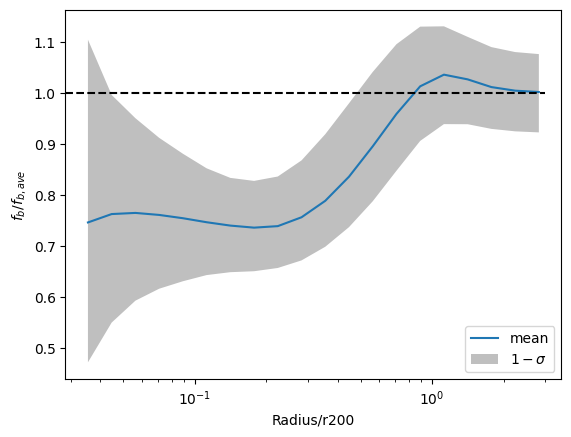

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/halos_ranked.hdf5", 'r')
r200=np.array(f['r200'])
r100=np.array(f['r100'])
r50=np.array(f['r50'])
id=np.array(f['id'])
mass=np.array(f['mass'])[id<=0]
f.close()

r200=r200[id<=0]
r100=r100[id<=0]
r50=r50[id<=0]
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/profile.hdf5", 'r')
dm=np.array(f['dm'])
g=np.array(f['g'])
s=np.array(f['s'])
bins=np.array(f['bins'])
f.close()


ratio=(g*8.56+s*6.174)/dm/45.2/(0.02222/0.7**2/0.316)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xscale('log')
#$ax.set_yscale('log')
#for i in tqdm(range(len(dm))):
#    ax.plot(bins, g[i]/dm[i])
average_ratio=np.mean(ratio, axis=0)

per=np.percentile(ratio, [16, 50, 84], axis=0)


    
ax.plot(bins, per[1], label='mean')

ax.fill_between(bins, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.legend()
ax.hlines(1,0,3,linestyles="dashed",colors='k')

ax.set_xlabel('Radius/r200')
ax.set_ylabel(r'$f_{b}$/$f_{b,ave}$')
plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/profile.png")

/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_1843/1667871301.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  p=ax.scatter(r100[S_200<10]/r200[S_200<10],S[S_200<10],s=0.3,alpha=0.3,cmap="rainbow")
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_1843/1667871301.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0, 0.5, 'S100-S200')

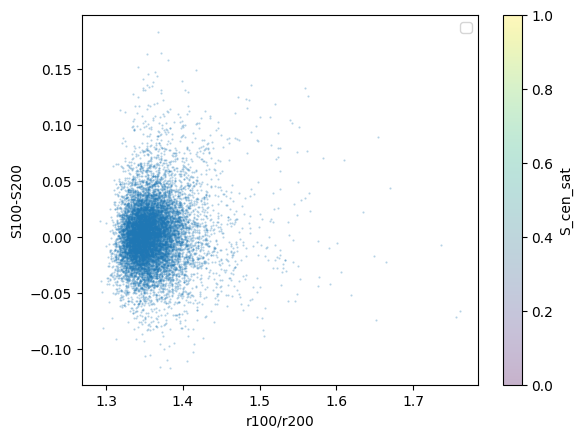

In [34]:
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/S_compare.hdf5",'r')
S_c=np.array(f["S_central"])
S_m=np.array(f["S_central_sat"])
S_100=np.array(f["S_r100"])
S_200=np.array(f["S_r200"])
S_rm50=np.array(f["S_r50_m"])
S_rm=np.array(f["S_mem_r100"])
f.close()
fig=plt.figure()
ax=fig.add_subplot(111)
#ax.set_xscale('log')

S=S_100-S_200
    
p=ax.scatter(r100[S_200<10]/r200[S_200<10],S[S_200<10],s=0.3,alpha=0.3,cmap="rainbow")
b=plt.colorbar(p)
b.set_label("S_cen_sat")
ax.legend()


ax.set_xlabel('r100/r200')
ax.set_ylabel('S100-S200')
#plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/profile.png")


7793
[[   59]
 [   96]
 [  235]
 [  297]
 [  335]
 [  430]
 [  474]
 [  506]
 [  513]
 [  516]
 [  655]
 [  727]
 [  788]
 [  860]
 [  908]
 [  982]
 [ 1018]
 [ 1027]
 [ 1108]
 [ 1173]
 [ 1259]
 [ 1407]
 [ 1508]
 [ 1645]
 [ 1885]
 [ 1893]
 [ 1943]
 [ 2098]
 [ 2124]
 [ 2125]
 [ 2144]
 [ 2197]
 [ 2307]
 [ 2498]
 [ 2689]
 [ 2794]
 [ 2851]
 [ 2866]
 [ 2895]
 [ 2916]
 [ 2924]
 [ 3044]
 [ 3046]
 [ 3141]
 [ 3359]
 [ 3400]
 [ 3490]
 [ 3662]
 [ 3779]
 [ 3816]
 [ 3822]
 [ 3993]
 [ 4081]
 [ 4168]
 [ 4373]
 [ 4460]
 [ 4509]
 [ 4541]
 [ 4929]
 [ 4978]
 [ 5137]
 [ 5239]
 [ 5256]
 [ 5338]
 [ 5440]
 [ 5451]
 [ 5494]
 [ 5580]
 [ 5715]
 [ 5792]
 [ 5899]
 [ 5910]
 [ 5995]
 [ 6140]
 [ 6169]
 [ 6229]
 [ 6610]
 [ 6619]
 [ 6634]
 [ 6719]
 [ 6778]
 [ 6800]
 [ 6892]
 [ 6992]
 [ 7096]
 [ 7130]
 [ 7437]
 [ 7462]
 [ 7493]
 [ 7554]
 [ 7592]
 [ 7607]
 [ 7652]
 [ 7696]
 [ 7734]
 [ 7765]
 [ 7846]
 [ 7869]
 [ 8043]
 [ 8099]
 [ 8182]
 [ 8240]
 [ 8331]
 [ 8349]
 [ 8373]
 [ 8491]
 [ 8501]
 [ 8547]
 [ 8625]
 [ 8753]
 [ 88

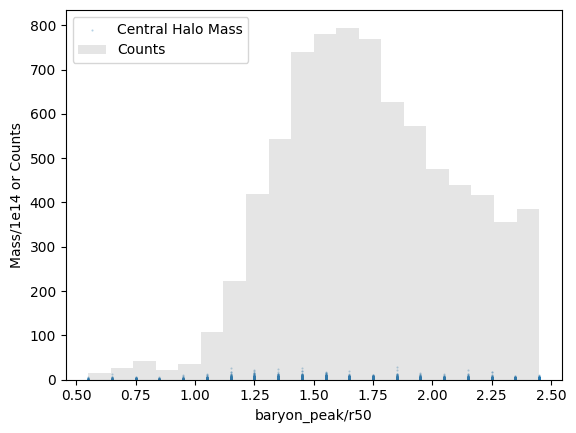

In [35]:
import numpy as np
import h5py
path="/Users/24756376/data/Flamingo/L1000N0900/"
import matplotlib.pyplot as plt
f=h5py.File(path+'S_dist.hdf5','r')
peak=np.array(f["bar_peak"])

f.close()
f=h5py.File(path+'S_compare.hdf5','r')

S=np.array(f["S_distance"])
f.close()
f=h5py.File(path+'halos_ranked.hdf5','r')
mass=np.array(f["mass"])
ids=np.array(f["id"])
f.close()
mass=mass[ids<=0]
print(len(peak[peak>0]))
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(peak[peak>0],mass[peak>0]/10**4,s=0.3,alpha=0.3,label='Central Halo Mass')
#ax.set_yscale("log")
ax.hist(peak[peak>0],bins=20,alpha=0.2,color='gray',label="Counts")
ax.set_xlabel('baryon_peak/r50')
ax.set_ylabel('Mass/1e14 or Counts')
ax.legend()
print(np.argwhere((peak>0.5)*(peak<1)))



[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5]


Text(0, 0.5, 'S_2.5R50')

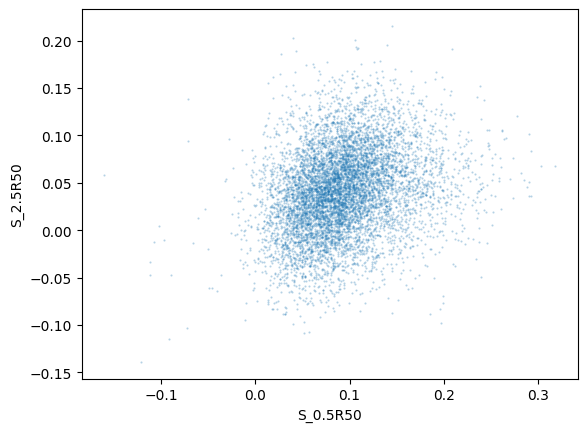

In [42]:
fig=plt.figure()
ax=fig.add_subplot(111)
bins=np.linspace(0.5,2.5,21)
bin=(bins[1:]+bins[:-1])/2
S_sam=S[:,0]-S[:,19]
print(bins)
ax.scatter(S[:,0][peak>0],S[:,19][peak>0],s=0.3,alpha=0.3,label='S_distance')
ax.set_xlabel('S_0.5R50')
ax.set_ylabel('S_2.5R50')